# Analyzing Portfolio Risk and Return

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.


### Importing Data

#### Import the required libraries and dependencies.

In [1]:
# Required libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline

#### Using the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame.

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# View of the first 5 rows of the DataFrame
whale_df = pd.read_csv(Path('Resources/whale_navs.csv'), index_col='date', parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Using the Pandas `pct_change` function together with `dropna` to create a clean daily returns DataFrame.

In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
whale_daily_returns = whale_df.pct_change().dropna()
whale_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Using the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. 

<AxesSubplot:title={'center':'Daily Return Report'}, xlabel='date'>

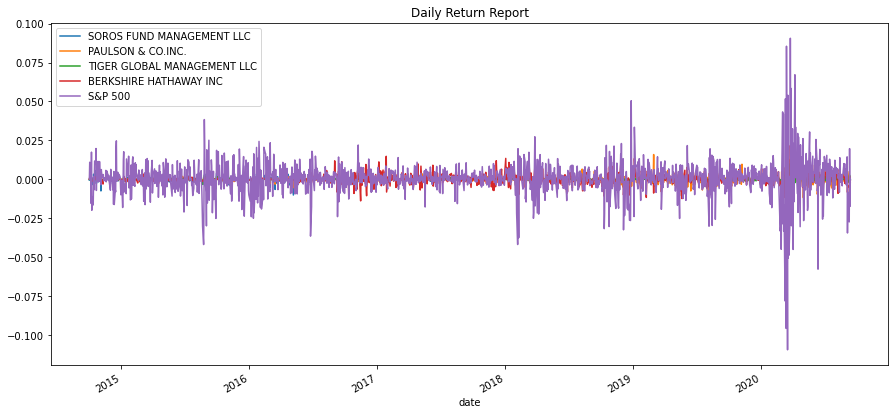

In [4]:
# Plot the daily return data of the 4 funds and the S&P 500 
whale_daily_returns.plot(figsize=(15, 7), title="Daily Return Report")

#### Using the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. 

In [5]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
whale_cumulative_returns = (1 + whale_daily_returns).cumprod()
whale_cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time.

<AxesSubplot:title={'center':'Cumulative Returns 2014-2020'}, xlabel='date'>

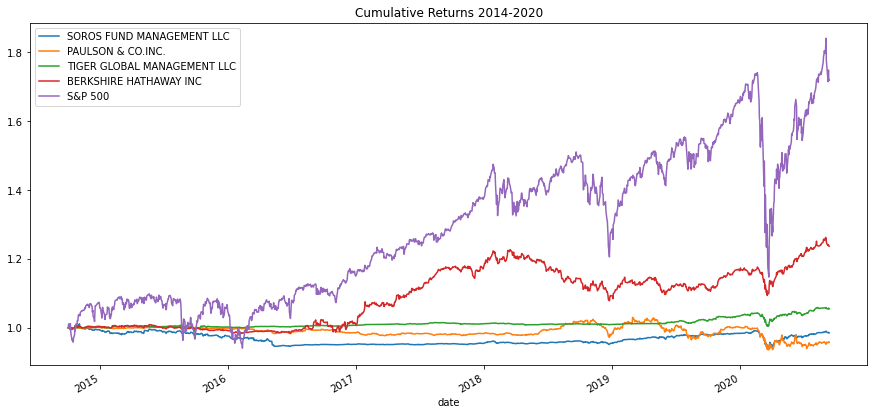

In [6]:
# Visual of the cumulative returns using the Pandas plot function
whale_cumulative_returns.plot(figsize=(15, 7), title="Cumulative Returns 2014-2020")

#### Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer**: Yes, they have the most cumulative return and it looks like Berkshire is cathing up behind. S&P500 pludged at the beginning of 2020 but it make up the loss pretty quickly.

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Using the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot.

<AxesSubplot:title={'center':'Daily Return Data'}>

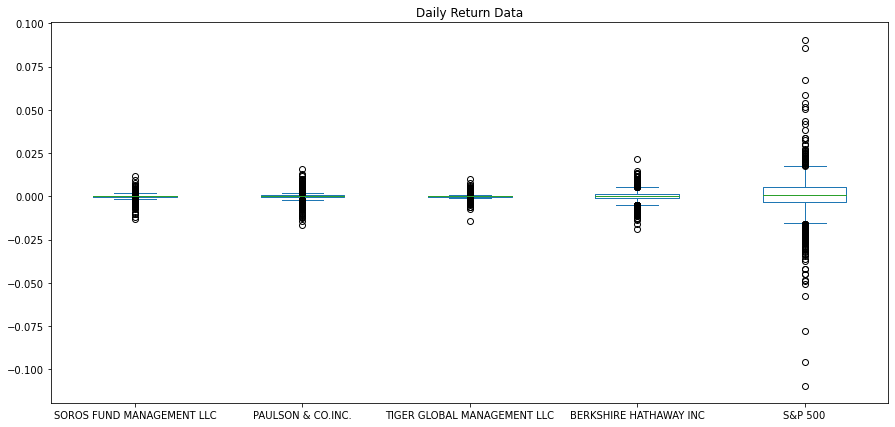

In [7]:
# Using the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500
whale_daily_returns.plot(kind="box", figsize=(15, 7), title = "Daily Return Data")

#### Using the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visual of the daily return data for just the four fund portfolios by using another box plot.

<AxesSubplot:title={'center':'Daily Return Data for 4 Major Funds'}>

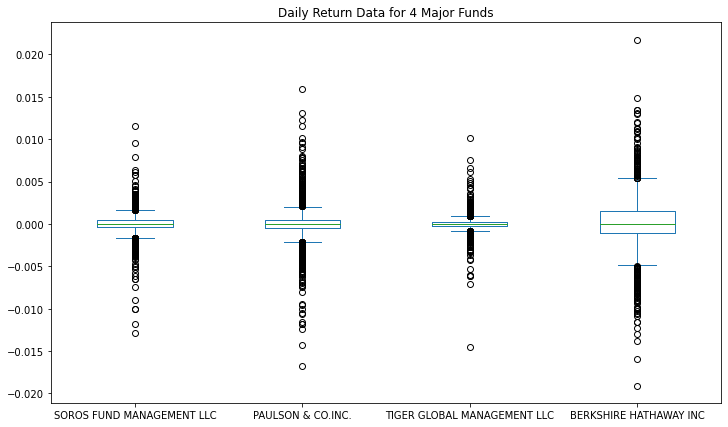

In [8]:
# Creating a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Creating box plots to reflect the return data for only the 4 fund portfolios
whale_4_df = whale_daily_returns.drop(columns=['S&P 500'])
whale_4_df.plot(kind="box", figsize=(12, 7), title="Daily Return Data for 4 Major Funds")

#### Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer**: Berkshire was the most volite stock, therefore the most risky. Meanhile Tiger Global Management was the least volatile which means more stable.

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Using the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Reviewing the standard deviation calculations, sorted from smallest to largest.

In [9]:
# Calculating and sorting the standard deviation for all 4 portfolios and the S&P 500 from smallest to largest
standard_deviation = whale_df.std()
standard_deviation_sorted = standard_deviation.sort_values()
standard_deviation_sorted

PAULSON & CO.INC.               0.240011
SOROS FUND MANAGEMENT LLC       0.485997
TIGER GLOBAL MANAGEMENT LLC     0.751144
BERKSHIRE HATHAWAY INC          4.185067
S&P 500                        41.005779
dtype: float64

#### Calculating the annualized standard deviation for each of the four portfolios and for the S&P 500 by multiply the standard deviation by the square root of the number of trading days (252 days).

In [10]:
# Calculating and sorting, from smallest to largest,
# the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
an_std = standard_deviation * np.sqrt(252)
an_std.sort_values()

PAULSON & CO.INC.                3.810063
SOROS FUND MANAGEMENT LLC        7.714968
TIGER GLOBAL MANAGEMENT LLC     11.924046
BERKSHIRE HATHAWAY INC          66.435883
S&P 500                        650.946561
dtype: float64

#### Using the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index.

<AxesSubplot:title={'center':'21 Days'}, xlabel='date'>

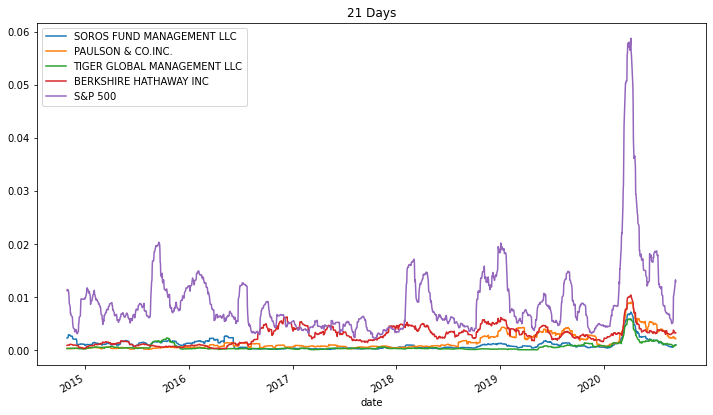

In [11]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
whale_daily_returns.rolling(window=21).std().plot(figsize=(12, 7), title=("21 Days"))

#### Using the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'4 Big Funds in 21 Days'}, xlabel='date'>

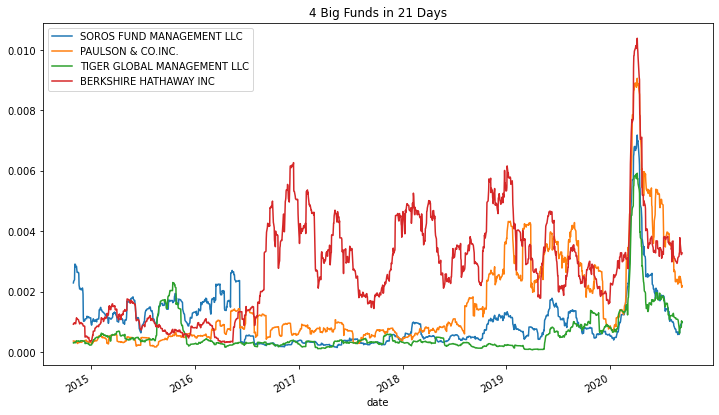

In [12]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
whale_4_df.rolling(window=21).std().plot(figsize=(12, 7), title=("4 Big Funds in 21 Days"))

Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** # YOUR ANSWER HERE

Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** # YOUR ANSWER HERE


Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # YOUR ANSWER HERE

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Using the daily return DataFrame to calculate the annualized (252 trading days) average return data for the four fund portfolios and for the S&P 500. Reviewing the annualized average returns, sorted from lowest to highest.

In [13]:
# Calculating the annual average return data for the for fund portfolios and the S&P 500
# Reviewing the annual average returns sorted from lowest to highest
an_std_avg = whale_df.mean() * 252
an_std_avg.sort_values()

PAULSON & CO.INC.               3741.204835
SOROS FUND MANAGEMENT LLC       7791.197220
BERKSHIRE HATHAWAY INC         14281.385271
TIGER GLOBAL MANAGEMENT LLC    15305.993233
S&P 500                        63161.009159
dtype: float64

#### Calculating the Sharpe ratios for the four fund portfolios and for the S&P 500 by dividing the annualized average return by the annualized standard deviation for each. Reviewing the Sharpe ratios result, sorted from lowest to highest.

In [14]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
whale_sharpe_ratio = an_std_avg / an_std
whale_sharpe_ratio.sort_values()

S&P 500                          97.029484
BERKSHIRE HATHAWAY INC          214.964933
PAULSON & CO.INC.               981.927406
SOROS FUND MANAGEMENT LLC      1009.880647
TIGER GLOBAL MANAGEMENT LLC    1283.624164
dtype: float64

#### Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart.

<AxesSubplot:title={'center':'Sharpe Ratio'}>

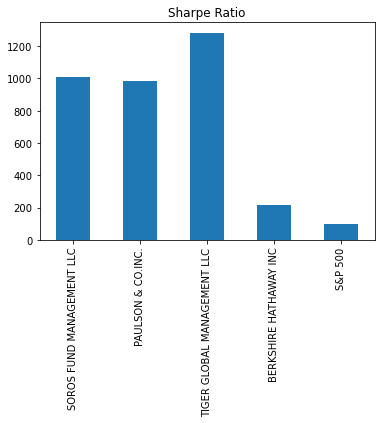

In [15]:
# Visualize the Sharpe ratios as a bar chart
whale_sharpe_ratio.plot.bar(title = "Sharpe Ratio")

#### Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Answer** # YOUR ANSWER HERE

---

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [16]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
# YOUR CODE HERE

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [17]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
# YOUR CODE HERE


##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [18]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
# YOUR CODE HERE


##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [19]:
# Calculate the average of the 60-day rolling beta
# YOUR CODE HERE


##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [20]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE


##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [21]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
# YOUR CODE HERE


##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [22]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
# YOUR CODE HERE


##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [23]:
# Calculate the average of the 60-day rolling beta
# YOUR CODE HERE


##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [24]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE


#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # YOUR ANSWER HERE


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # YOUR ANSWER HERE

---